<a href="https://colab.research.google.com/github/lim-jr/ESAA/blob/main/00_PTKorea%EC%A0%9C%EC%B6%9C%EC%9A%A9_%EB%B3%91%EC%9B%90%EA%B0%9C%ED%8F%90%EC%97%85%EB%B6%84%EB%A5%98%EC%98%88%EC%B8%A1_%EC%B5%9C%EC%A2%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**병원 개/폐업 분류 예측 경진대회**
- 관련 사이트: https://dacon.io/competitions/official/9565/overview/description

- 과제 : 데이콘의 '병원 개/폐업 분류 예측 경진대회' 데이터셋을 전처리 및 시각화하고, 분류 알고리즘을 적용한다..

- 조건 : 분류 모델 3가지 이상 적용

# 1. 데이터셋 불러오기

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
import numpy as np
import pandas as pd 

In [11]:
pd.options.display.float_format = '{:.2f}'.format

In [12]:
train = pd.read_csv('/content/drive/MyDrive/PyCo_ESAA/데이터셋/train 지역변수 추가.csv')
test = pd.read_csv('/content/drive/MyDrive/PyCo_ESAA/데이터셋/test 지역변수 추가.csv')

In [13]:
test.head(3)

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange,hospital_count
0,2,NaN,incheon,139,19981125.00,300.00,general_hospital,66824864410.00,0.00,65657092101.00,...,50684431667.00,37143344381.00,4720000000.00,4690000000.00,16085395374.00,8944587276.00,693.00,693.00,same,1.00
1,5,NaN,jeju,149,20160309.00,44.00,hospital,34957575568.00,0.00,32592697196.00,...,42098280733.00,24200000000.00,25210094437.00,18300000000.00,3789134965.00,0.00,379.00,371.00,same,1.00
2,6,NaN,jeonnam,103,19890427.00,276.00,general_hospital,23260305967.00,2542570943.00,23087485220.00,...,27775892339.00,21822782890.00,0.00,0.00,0.00,16385400958.00,NaN,NaN,NaN,3.00


In [14]:
train.head(3)

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange,hospital_count
0,1,open,choongnam,73,20071228,175.00,nursing_hospital,4217530010.00,0.00,3961134739.00,...,222876855.00,0.00,536116887.00,390000000.00,2619290493.00,1271224493.00,62.00,64.00,same,14.00
1,3,open,gyeongnam,32,19970401,410.00,general_hospital,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,801.00,813.00,same,5.00
2,4,open,gyeonggi,89,20161228,468.00,nursing_hospital,1004521989.00,515483669.00,447219722.00,...,0.00,0.00,0.00,0.00,0.00,0.00,234.00,1.00,same,17.00


In [15]:
train.describe()

,inst_id,sgg,openDate,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,hospital_count
count,301.00,301.00,301.00,296.00,293.00,293.00,293.00,293.00,293.00,293.00,...,293.00,293.00,293.00,293.00,293.00,293.00,293.00,291.00,288.00,299.00
mean,219.06,81.04,20050125.80,145.71,12881747447.99,2014902794.59,10332439064.09,5654114566.90,269615124.57,511587022.57,...,8146026488.79,3860583593.41,1510050431.99,4471247363.88,2709978815.42,5273919018.09,978627865.26,142.55,134.33,10.23
std,121.23,50.97,88938.15,118.92,20435433475.62,7460270656.57,14938862491.95,8083342530.26,802370115.51,1060379255.45,...,12557995349.37,6797242094.08,2953412250.37,7659580436.40,4564001071.00,10812593821.25,4688797890.98,160.19,151.06,6.22
min,1.00,1.00,19780124.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,-20147802018.00,-2781506722.00,0.00,0.00,1.00
25%,112.00,37.00,20011017.00,52.75,3252111902.00,0.00,2758200772.00,1626052720.00,8217133.00,80133952.00,...,1283220350.00,285574118.00,0.00,25578782.00,0.00,1017572570.00,0.00,53.50,53.75,5.00
50%,230.00,75.00,20071126.00,136.50,5524218104.00,210410492.00,4684074465.00,2659892367.00,43637641.00,183196506.00,...,3784552900.00,1454049945.00,85425488.00,1969746813.00,1100000000.00,2894969804.00,0.00,80.00,79.00,10.00
75%,321.00,123.00,20111021.00,193.00,12748392940.00,910527771.00,10778762060.00,6363400069.00,205033071.00,420333030.00,...,8465053127.00,4364713622.00,1567966980.00,4905441439.00,3360000000.00,5370284792.00,101444685.00,181.50,170.00,15.50
max,428.00,178.00,20170607.00,656.00,151000000000.00,98503322990.00,103000000000.00,64035593950.00,9144170639.00,8686379500.00,...,85088583901.00,68468775764.00,17593752360.00,51503883627.00,32561472110.00,125000000000.00,68527297093.00,1200.00,1200.00,20.00


#### **변수설명**
> `inst_id` - 각 파일에서의 병원 고유 번호
`OC` – 영업/폐업 분류, 2018년 폐업은 2017년 폐업으로 간주함    
`sido` – 병원의 광역 지역 정보    
`sgg` – 병원의 시군구 자료     
`openDate` – 병원 설립일    
`bedCount` - 병원이 갖추고 있는 병상의 수       
`instkind` – 병원, 의원, 요양병원, 한의원, 종합병원 등 병원의 종류    
·        종합병원 : 입원환자 100명 이상 수용 가능    
·        병원 : 입원 환자 30명 이상 100명 미만 수용 가능     
·        의원 : 입원 환자 30명 이하 수용 가능      
·        한방 병원(한의원) : 침술과 한약으로 치료하는 의료 기관.    
`revenue1` – 매출액 / salescost1 – 매출원가      
`sga1` - 판매비와 관리비 / salary1 – 급여   
`noi1` – 영업외수익 / noe1 – 영업외비용      
`Interest1` – 이자비용 / ctax1 – 법인세비용     
`Profit1` – 당기순이익 / liquidAsset1 – 유동자산      
`quickAsset1` – 당좌자산 / receivableS1 - 미수금(단기)       
`inventoryAsset1` – 재고자산 / nonCAsset1 – 비유동자산     
`tanAsset1` – 유형자산 / OnonCAsset1 - 기타 비유동자산       
`receivableL1` – 장기미수금 / debt1 – 부채총계      
`liquidLiabilities1` – 유동부채 / shortLoan1 – 단기차입금    
`NCLiabilities1` – 비유동부채 / longLoan1 – 장기차입금    
`netAsset1` – 순자산총계 / surplus1 – 이익잉여금    
`employee1` – 고용한 총 직원의 수     
`ownerChange` – 대표자의 변동 

# 2. EDA 및 전처리

In [16]:
train.isnull().sum()

inst_id                0
OC                     0
sido                   0
sgg                    0
openDate               0
bedCount               5
instkind               1
revenue1               8
salescost1             8
sga1                   8
salary1                8
noi1                   8
noe1                   8
interest1              8
ctax1                  8
profit1                8
liquidAsset1           8
quickAsset1            8
receivableS1           8
inventoryAsset1        8
nonCAsset1             8
tanAsset1              8
OnonCAsset1            8
receivableL1           8
debt1                  8
liquidLiabilities1     8
shortLoan1             8
NCLiabilities1         8
longLoan1              8
netAsset1              8
surplus1               8
revenue2               8
salescost2             8
sga2                   8
salary2                8
noi2                   8
noe2                   8
interest2              8
ctax2                  8
profit2                8


In [17]:
test.isnull().sum()

inst_id                 0
OC                    127
sido                    0
sgg                     0
openDate                1
bedCount                8
instkind                2
revenue1                2
salescost1              2
sga1                    2
salary1                 2
noi1                    2
noe1                    2
interest1               2
ctax1                   2
profit1                 2
liquidAsset1            2
quickAsset1             2
receivableS1            2
inventoryAsset1         2
nonCAsset1              2
tanAsset1               2
OnonCAsset1             2
receivableL1            2
debt1                   2
liquidLiabilities1      2
shortLoan1              2
NCLiabilities1          2
longLoan1               2
netAsset1               2
surplus1                2
revenue2                2
salescost2              2
sga2                    2
salary2                 2
noi2                    2
noe2                    2
interest2               2
ctax2       

### (1) 레이블 데이터 : 인코딩

In [18]:
from sklearn.preprocessing import LabelEncoder

# OC : 'close': 0, 'open': 1 처리해주기
print(train['OC'].value_counts()) #인코딩전 확인
encoder1 = LabelEncoder()
train['OC']=encoder1.fit_transform(train['OC'])
print(train['OC'].value_counts()) #인코딩후 확인

# 테스트데이터셋은 OC가 모두 NaN이므로 레이블인코딩 처리x

open      286
 close     15
Name: OC, dtype: int64
1    286
0     15
Name: OC, dtype: int64


### (2) 피처 데이터 : 결측치 처리 및 인코딩

* 문자열 피처의 결측치는 Not_sure 로 대체.
* 숫자형 피처의 결측치는 -9999 로 대체.


#### (2)-1. ints_id, sgg

In [19]:
# inst_id : 인덱스 중복이므로 열 버리기
# sgg : sido와 정보가 겹치므로 열 버리기
train.drop(['inst_id','sgg'],axis=1,inplace=True)
test.drop(['inst_id','sgg'],axis=1,inplace=True)

#### (2)-2. 문자열 피처

In [20]:
## 문자열 피처에서 결측치가 존재할 경우, 'Not_sure'로 대체
# 문자열 피처중 instkind, ownerChange 에서 결측치 존재

train['instkind'] = train['instkind'].fillna('Not_sure')
test['instkind'] = test['instkind'].fillna('Not_sure')

train['ownerChange'] = train['ownerChange'].fillna('Not_sure')
test['ownerChange'] = test['ownerChange'].fillna('Not_sure')

#### (2)-3. 숫자형 피처중 금융변수

In [21]:
## 숫자형 피처중 금융변수에서 결측치(NaN) 존재

# open&같은행번호에서 공통적으로 8개의 결측치가 나타난다. 
print(train[train['revenue1'].isnull()]['OC'])
print(train[train['shortLoan2'].isnull()]['OC'])

# 같은행번호에서 공통적으로 2개의 결측치가 나타난다.
print(test[test['revenue1'].isnull()])
print(test[test['shortLoan2'].isnull()])

1      1
14     1
32     1
55     1
60     1
248    1
257    1
258    1
Name: OC, dtype: int64
1      1
14     1
32     1
55     1
60     1
248    1
257    1
258    1
Name: OC, dtype: int64
    OC     sido    openDate  bedCount          instkind  revenue1  salescost1  \
15 NaN    busan 19950330.00    226.00  general_hospital       NaN         NaN   
56 NaN  jeonbuk 20121218.00    539.00  nursing_hospital       NaN         NaN   

    sga1  salary1  noi1  ...  liquidLiabilities2  shortLoan2  NCLiabilities2  \
15   NaN      NaN   NaN  ...                 NaN         NaN             NaN   
56   NaN      NaN   NaN  ...                 NaN         NaN             NaN   

    longLoan2  netAsset2  surplus2  employee1  employee2  ownerChange  \
15        NaN        NaN       NaN     566.00     566.00         same   
56        NaN        NaN       NaN     250.00     200.00         same   

    hospital_count  
15            2.00  
56            6.00  

[2 rows x 57 columns]
    OC     sido    

In [22]:
#NAN인 관측치 처리(dropna)
fin_list=['revenue1', 'salescost1', 'sga1', 'salary1', 'noi1', 'noe1',
       'interest1', 'ctax1', 'profit1', 'liquidAsset1', 'quickAsset1',
       'receivableS1', 'inventoryAsset1', 'nonCAsset1', 'tanAsset1',
       'OnonCAsset1', 'receivableL1', 'debt1', 'liquidLiabilities1',
       'shortLoan1', 'NCLiabilities1', 'longLoan1', 'netAsset1', 'surplus1',
       'revenue2', 'salescost2', 'sga2', 'salary2', 'noi2', 'noe2',
       'interest2', 'ctax2', 'profit2', 'liquidAsset2', 'quickAsset2',
       'receivableS2', 'inventoryAsset2', 'nonCAsset2', 'tanAsset2',
       'OnonCAsset2', 'receivableL2', 'debt2', 'liquidLiabilities2',
       'shortLoan2', 'NCLiabilities2', 'longLoan2', 'netAsset2', 'surplus2']
train[fin_list]=train[fin_list].fillna(-9999)
test[fin_list]=test[fin_list].fillna(-9999)
#0인 관측치 처리
train[fin_list]=train[fin_list].replace(0 ,-9999)
test[fin_list]=test[fin_list].replace(0 ,-9999)

In [23]:
test.isnull().sum()

OC                    127
sido                    0
openDate                1
bedCount                8
instkind                0
revenue1                0
salescost1              0
sga1                    0
salary1                 0
noi1                    0
noe1                    0
interest1               0
ctax1                   0
profit1                 0
liquidAsset1            0
quickAsset1             0
receivableS1            0
inventoryAsset1         0
nonCAsset1              0
tanAsset1               0
OnonCAsset1             0
receivableL1            0
debt1                   0
liquidLiabilities1      0
shortLoan1              0
NCLiabilities1          0
longLoan1               0
netAsset1               0
surplus1                0
revenue2                0
salescost2              0
sga2                    0
salary2                 0
noi2                    0
noe2                    0
interest2               0
ctax2                   0
profit2                 0
liquidAsset2

In [24]:
## 확인
train.describe()
test.describe()
# 최소값이 -9999로 나타난다.

,OC,openDate,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,hospital_count
count,0.00,126.00,119.00,127.00,127.00,127.00,127.00,127.00,127.00,127.00,...,127.00,127.00,127.00,127.00,127.00,127.00,127.00,119.00,112.00,125.00
mean,NaN,20050851.33,172.79,17957148996.71,3910744918.24,13193011041.31,7298310355.82,509400377.83,856722125.09,311835084.30,...,11711132178.68,5544714807.40,2147351051.79,6392739582.83,4412085929.84,6019859004.87,1622507832.91,204.25,189.22,5.34
std,NaN,87958.15,126.02,31169140185.46,14095090995.64,20449851950.75,12039741984.20,1185398033.98,1793386390.22,456842664.89,...,19611225612.56,9610887600.13,4920550567.77,11968388025.29,7478144160.71,9765235769.22,4745836926.38,277.31,243.03,3.66
min,NaN,19760409.00,0.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,...,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-2955957091.00,-8600000000.00,16.00,0.00,1.00
25%,NaN,20000826.00,94.00,3205468345.00,-9999.00,2997397718.00,1595125465.50,14772343.00,70855468.00,50224681.00,...,1481669239.50,339035575.50,-9999.00,30500000.00,-9999.00,847357677.00,-9999.00,59.50,54.75,2.00
50%,NaN,20071066.00,156.00,6471901320.00,160142250.00,5532193576.00,3178469750.00,52545761.00,226752100.00,146502812.00,...,4450282269.00,1441659454.00,178006844.00,1972194496.00,1741100000.00,2426588149.00,-9999.00,106.00,99.00,4.00
75%,NaN,20117895.50,213.00,16841242452.00,1186987248.00,13972412360.00,7138931382.00,370665940.50,632589526.50,338345332.00,...,13117736455.00,6330150193.00,2467240191.00,5423608736.00,4773523925.00,5853042245.00,688553211.00,230.00,235.25,7.00
max,NaN,20170531.00,771.00,181000000000.00,116000000000.00,127000000000.00,82395611833.00,7302719335.00,11496795211.00,2573803974.00,...,131000000000.00,52414267533.00,37143344381.00,78556538604.00,36202877976.00,49244922328.00,25617866194.00,1816.00,1547.00,13.00


#### (2)-4. bedcount, employee



In [25]:
## 숫자형 피처의 결측치는 -9999로 대체
train['bedCount']=train['bedCount'].fillna(-9999)
test['bedCount']=test['bedCount'].fillna(-9999)

train['employee1']=train['employee1'].fillna(-9999)
test['employee1']=test['employee1'].fillna(-9999)

train['employee2']=train['employee2'].fillna(-9999)
test['employee2']=test['employee2'].fillna(-9999)

#### (2)-5. 피처 인코딩 처리

In [26]:
## 문자열 피처 인코딩 처리
## 전처리 후 마지막에

# sido는 레이블인코딩 (sido의 개별관측치가 많아 원핫인코딩을 하게 되면 변수개수가 너무많아지기 때문.)
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
train['sido'] = encoder.fit_transform(train['sido'])
test['sido'] = encoder.fit_transform(test['sido'])

# instkind, ownerChange는 원핫인코딩
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [27]:
## 확인
train.head(3)
# sido는 숫자형변수로, instkind, ownerChange는 더미변수로 잘 바뀜.

,OC,sido,openDate,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,...,instkind_clinic,instkind_dental_clinic,instkind_general_hospital,instkind_hospital,instkind_nursing_hospital,instkind_traditional_clinic,instkind_traditional_hospital,ownerChange_Not_sure,ownerChange_change,ownerChange_same
0,1,2,20071228,175.00,4217530010.00,-9999.00,3961134739.00,2033835290.00,15652441.00,15236236.00,...,0,0,0,0,1,0,0,0,0,1
1,1,9,19970401,410.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,...,0,0,1,0,0,0,0,0,0,1
2,1,8,20161228,468.00,1004521989.00,515483669.00,447219722.00,296402310.00,76156.00,30000.00,...,0,0,0,0,1,0,0,0,0,1


# 3. 파생변수 만들기

### (1) 금융변수

In [28]:
## 성장성
# 매출액 증가율 = 당기매출액/ 전기매출액*100 -100
train['revenueGrowth']=(train['revenue1']/train['revenue2'])*100-100
# 총자산 증가율 = 당기총자산/ 전기총자산*100 -100
train['netAssetGrowth']=(train['netAsset1']+train['debt1'])/(train['netAsset2']+train['debt2'])*100 -100

## 수익성
# 자기자본순이익률(ROE)=당기순이익/자기자본*100
train['ROE']=(train['profit1']/train['netAsset1'])*100
# 매출순이익률 = 당기순이익/매출액*100
train['ROS'] = train.profit1/train.revenue1*100
# 배당성향 = 배당금/당기순이익
train['dividendPayoutRatio'] = (train.profit1-train.surplus1)/train.profit1
# 이자보상비율 = 영업이익/이자비용*100
# (영업손익은 매출액 등의 영업수익으로부터 매출원가ㆍ판매비와관리비 등의 영업비용을 차감한 개념, 영업 외 이익과 비용도 차감)
train['interestCoverageRatio'] = (train.revenue1-train.salescost1-train.sga1-train.noi1-train.noe1)/train.interest1*100

## 안정성
# 유동비율 = 유동자산/유동부채*100 (바람직: 200%이상)
train['liquidRatio']=(train['liquidAsset1']/train['liquidLiabilities1'])*100
# 당좌비율 = 당좌자산/유동부채*100 (바람직: 100%이상)
train['quickRatio']=(train['quickAsset1']/train['liquidLiabilities1'])*100
# 부채비율 = 부채/자본*100
train['debtRatio']=(train['debt1']/(train['debt1']+train['netAsset1']))*100
# 자기자본비율 = 자기자본/총자본*100
train['netAssetRatio']=train.netAsset1/(train.debt1+train.netAsset1)*100

## 활동성
# 재고자산회전율 = 매출원가/평균재고자산
train['inventoryTurnover']=train.salescost1/((train.inventoryAsset1+train.inventoryAsset2)/2)

In [29]:
## 성장성
# 매출액 증가율 = 당기매출액/ 전기매출액*100 -100
test['revenueGrowth']=(test['revenue1']/test['revenue2'])*100-100
# 총자산 증가율 = 당기총자산/ 전기총자산*100 -100
test['netAssetGrowth']=(test['netAsset1']+test['debt1'])/(test['netAsset2']+test['debt2'])*100 -100

## 수익성
# 자기자본순이익률(ROE)=당기순이익/자기자본*100
test['ROE']=(test['profit1']/test['netAsset1'])*100
# 매출순이익률 = 당기순이익/매출액*100
test['ROS'] = test.profit1/test.revenue1*100
# 배당성향 = 배당금/당기순이익
test['dividendPayoutRatio'] = (test.profit1-test.surplus1)/test.profit1
# 이자보상비율 = 영업이익/이자비용*100
# (영업손익은 매출액 등의 영업수익으로부터 매출원가ㆍ판매비와관리비 등의 영업비용을 차감한 개념, 영업 외 이익과 비용도 차감)
test['interestCoverageRatio'] = (test.revenue1-test.salescost1-test.sga1-test.noi1-test.noe1)/test.interest1*100

## 안정성
# 유동비율 = 유동자산/유동부채*100 (바람직: 200%이상)
test['liquidRatio']=(test['liquidAsset1']/test['liquidLiabilities1'])*100
# 당좌비율 = 당좌자산/유동부채*100 (바람직: 100%이상)
test['quickRatio']=(test['quickAsset1']/test['liquidLiabilities1'])*100
# 부채비율 = 부채/자본*100
test['debtRatio']=(test['debt1']/(test['debt1']+test['netAsset1']))*100
# 자기자본비율 = 자기자본/총자본*100
test['netAssetRatio']=test.netAsset1/(test.debt1+test.netAsset1)*100

## 활동성
# 재고자산회전율 = 매출원가/평균재고자산
test['inventoryTurnover']=test.salescost1/((test.inventoryAsset1+test.inventoryAsset2)/2)

In [30]:
## 확인
fin_Ratio_list = ['revenueGrowth', 'netAssetGrowth',
    'ROE', 'ROS', 'dividendPayoutRatio', 'interestCoverageRatio',
    'liquidRatio', 'quickRatio', 'debtRatio','netAssetRatio',
    'inventoryTurnover']
train[fin_Ratio_list].describe()

fin_Ratio_list = ['revenueGrowth', 'netAssetGrowth',
    'ROE', 'ROS', 'dividendPayoutRatio', 'interestCoverageRatio',
    'liquidRatio', 'quickRatio', 'debtRatio','netAssetRatio',
    'inventoryTurnover']
test[fin_Ratio_list].describe()
# min값에 0이 없고, max값에 inf가 없다.

,revenueGrowth,netAssetGrowth,ROE,ROS,dividendPayoutRatio,interestCoverageRatio,liquidRatio,quickRatio,debtRatio,netAssetRatio,inventoryTurnover
count,127.00,127.00,127.00,127.00,127.00,127.00,127.00,127.00,127.00,127.00,127.00
mean,-3317177.84,-5603557.35,639641.71,-219685.11,-5.50,507656.86,153.28,149.16,59.66,40.34,-4051.21
std,18153834.09,21956571.60,3551577.39,2475673.20,27.47,6172500.04,261.96,258.52,22.43,22.43,21831.66
min,-135183193.89,-140406111.76,-3411950.94,-27899424.66,-255.10,-6325280.24,3.03,3.03,2.39,-34.90,-172634.69
25%,-2.95,-3.40,1.03,0.11,-3.22,-525.50,46.65,44.84,49.54,25.59,0.01
50%,2.02,1.19,5.13,2.12,1.00,6.69,85.30,82.83,59.17,40.83,4.28
75%,8.88,7.55,10.86,5.00,1.00,132.51,144.71,141.33,74.41,50.46,20.28
max,9362.25,149.89,25016319.71,100.00,18.54,69123223.39,1843.15,1843.15,134.90,97.61,3019.94


### (2) 중소병원/대형병원

In [31]:
train.loc[train.bedCount>300,'hospital_size']=1
train.loc[train.bedCount<=300,'hospital_size']=0

In [32]:
test.loc[test.bedCount>300,'hospital_size']=1
test.loc[test.bedCount<=300,'hospital_size']=0

### (3) 지역 내 병원종류수

In [33]:
#  이건 모델 돌리고나서 만들기
#hospital_count 결측값 처리 코드
train['hospital_count']=train['hospital_count'].replace(np.nan, 1)
#hospital_count 결측값 제거 확인 코드
train['hospital_count'].isnull().sum()

0

# 4. 피처 정규화

* 표준화 : 정규분포를 가진 값으로 변환 
            (x-mean)/sd
* 정규화 : 개별 데이터의 크기를 모두 똑같은 단위로 변경
            (x-min)/(max-min)

In [34]:
#금융변수 정규화
from sklearn.preprocessing import MinMaxScaler
train.loc[:,'revenue1':'surplus2'] = MinMaxScaler().fit_transform(train.loc[:,'revenue1':'surplus2'])
train.loc[:,'revenueGrowth':'inventoryTurnover'] = MinMaxScaler().fit_transform(train.loc[:,'revenueGrowth':'inventoryTurnover'])
test.loc[:,'revenue1':'surplus2'] = MinMaxScaler().fit_transform(test.loc[:,'revenue1':'surplus2'])
test.loc[:,'revenueGrowth':'inventoryTurnover'] = MinMaxScaler().fit_transform(test.loc[:,'revenueGrowth':'inventoryTurnover'])

In [35]:
#전체 데이터 확인
pd.set_option('display.max_columns', None) # 전체 열 보기

In [36]:
#정규화 여부 확인
train.describe()
#금융변수의 최솟값은 0 최댓값은 1로 정규화가 잘 되었다고 볼 수 있다. 

,OC,sido,openDate,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,liquidAsset1,quickAsset1,receivableS1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,receivableL1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1,revenue2,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,profit2,liquidAsset2,quickAsset2,receivableS2,inventoryAsset2,nonCAsset2,tanAsset2,OnonCAsset2,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,hospital_count,instkind_Not_sure,instkind_clinic,instkind_dental_clinic,instkind_general_hospital,instkind_hospital,instkind_nursing_hospital,instkind_traditional_clinic,instkind_traditional_hospital,ownerChange_Not_sure,ownerChange_change,ownerChange_same,revenueGrowth,netAssetGrowth,ROE,ROS,dividendPayoutRatio,interestCoverageRatio,liquidRatio,quickRatio,debtRatio,netAssetRatio,inventoryTurnover,hospital_size
count,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00
mean,0.95,7.12,20050125.80,-22.81,0.08,0.02,0.10,0.09,0.03,0.06,0.06,0.03,0.40,0.08,0.08,0.05,0.05,0.07,0.07,0.03,0.00,0.10,0.11,0.09,0.08,0.06,0.16,0.03,0.08,0.02,0.09,0.08,0.05,0.06,0.07,0.02,0.30,0.08,0.08,0.04,0.06,0.06,0.06,0.04,0.00,0.09,0.05,0.08,0.08,0.08,0.17,0.05,-194.38,-303.33,10.17,0.00,0.06,0.00,0.12,0.29,0.48,0.01,0.03,0.04,0.14,0.82,0.99,0.98,0.48,0.01,0.65,0.40,1.00,1.00,0.11,0.89,0.99,0.08
std,0.22,4.19,88938.15,1304.10,0.13,0.07,0.14,0.13,0.09,0.12,0.10,0.09,0.09,0.15,0.14,0.10,0.12,0.11,0.10,0.09,0.06,0.15,0.16,0.16,0.14,0.11,0.08,0.06,0.14,0.08,0.14,0.12,0.13,0.13,0.10,0.09,0.08,0.15,0.15,0.09,0.14,0.10,0.09,0.10,0.06,0.15,0.10,0.17,0.15,0.14,0.07,0.06,1827.37,2068.65,6.25,0.06,0.24,0.06,0.33,0.46,0.50,0.11,0.16,0.20,0.35,0.38,0.07,0.10,0.05,0.06,0.05,0.05,0.06,0.06,0.07,0.07,0.08,0.28
min,0.00,0.00,19780124.00,-9999.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-9999.00,-9999.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,3.00,20011017.00,50.00,0.02,0.00,0.02,0.02,0.00,0.01,0.01,0.00,0.39,0.02,0.01,0.00,0.00,0.02,0.02,0.00,0.00,0.02,0.01,0.00,0.00,0.00,0.13,0.02,0.02,0.00,0.02,0.02,0.00,0.01,0.01,0.00,0.28,0.01,0.01,0.00,0.00,0.01,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.14,0.04,51.00,50.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.48,0.00,0.66,0.40,1.00,1.00,0.09,0.87,1.00,0.00
50%,1.00,8.00,20071126.00,134.00,0.04,0.00,0.04,0.04,0.00,0.02,0.04,0.00,0.39,0.03,0.03,0.01,0.01,0.04,0.03,0.00,0.00,0.05,0.04,0.01,0.04,0.02,0.15,0.02,0.04,0.00,0.04,0.04,0.01,0.02,0.03,0.00,0.29,0.03,0.03,0.01,0.01,0.03,0.03,0.00,0.00,0.04,0.02,0.00,0.04,0.03,0.16,0.04,79.00,76.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.48,0.00,0.66,0.40,1.00,1.00,0.10,0.90,1.00,0.00
75%,1.00,10.00,20111021.00,192.00,0.08,0.01,0.10,0.09,0.02,0.05,0.08,0.01,0.41,0.08,0.07,0.05,0.05,0.08,0.07,0.02,0.00,0.11,0.13,0.10,0.09,0.08,0.16,0.02,0.09,0.01,0.09,0.09,0.04,0.05,0.08,0.01,0.30,0.07,0.07,0.04,0.04,0.07,0.07,0.02,0.00,0.10,0.06,0.09,0.09,0.10,0.18,0.04,177.00,161.00,14.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.48,0.00,0.66,0.40,1.00,1.00,0.13,0.91,1.00,0.00
max,1.00,15.00,20170607.00,656.00,1.00,1.0

In [37]:
## 정규화 여부 확인
test[fin_list].describe()
#금융변수의 최솟값은 0 최댓값은 1로 정규화가 잘 되었다고 볼 수 있다. 

,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,liquidAsset1,quickAsset1,receivableS1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,receivableL1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1,revenue2,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,profit2,liquidAsset2,quickAsset2,receivableS2,inventoryAsset2,nonCAsset2,tanAsset2,OnonCAsset2,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2
count,127.00,127.00,127.00,127.00,127.00,127.00,127.00,127.00,127.00,127.00,127.00,127.00,127.00,127.00,127.00,127.00,127.00,127.00,127.00,127.00,127.00,127.00,127.00,127.00,127.00,127.00,127.00,127.00,127.00,127.00,127.00,127.00,127.00,127.00,127.00,127.00,127.00,127.00,127.00,127.00,127.00,127.00,127.00,127.00,127.00,127.00,127.00,127.00
mean,0.10,0.03,0.10,0.09,0.07,0.07,0.12,0.05,0.36,0.10,0.10,0.04,0.10,0.12,0.13,0.05,0.01,0.10,0.10,0.08,0.08,0.16,0.20,0.25,0.10,0.03,0.10,0.08,0.07,0.06,0.08,0.06,0.32,0.07,0.07,0.04,0.10,0.11,0.12,0.05,0.01,0.09,0.11,0.06,0.08,0.12,0.17,0.30
std,0.17,0.12,0.16,0.15,0.16,0.16,0.18,0.13,0.11,0.17,0.17,0.10,0.17,0.17,0.18,0.14,0.09,0.16,0.17,0.15,0.13,0.22,0.19,0.13,0.17,0.12,0.16,0.14,0.16,0.13,0.14,0.17,0.11,0.14,0.14,0.10,0.19,0.17,0.18,0.14,0.09,0.15,0.18,0.13,0.15,0.21,0.19,0.14
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.02,0.00,0.02,0.02,0.00,0.01,0.02,0.00,0.34,0.02,0.02,0.00,0.00,0.03,0.03,0.00,0.00,0.02,0.01,0.00,0.01,0.01,0.10,0.20,0.02,0.00,0.02,0.02,0.00,0.00,0.01,0.00,0.29,0.01,0.01,0.00,0.00,0.02,0.02,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.07,0.25
50%,0.04,0.00,0.04,0.04,0.01,0.02,0.06,0.00,0.35,0.04,0.04,0.01,0.02,0.05,0.06,0.01,0.00,0.04,0.03,0.01,0.03,0.08,0.13,0.20,0.03,0.00,0.04,0.04,0.01,0.01,0.03,0.00,0.30,0.03,0.03,0.01,0.02,0.05,0.05,0.00,0.00,0.03,0.03,0.00,0.03,0.05,0.10,0.25
75%,0.09,0.01,0.11,0.09,0.05,0.06,0.13,0.03,0.37,0.09,0.09,0.04,0.11,0.12,0.12,0.03,0.00,0.11,0.11,0.07,0.08,0.19,0.19,0.23,0.09,0.01,0.10,0.09,0.04,0.06,0.08,0.02,0.32,0.07,0.07,0.04,0.10,0.11,0.10,0.03,0.00,0.10,0.12,0.07,0.07,0.13,0.17,0.27
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [38]:
#정규화 여부 확인
test[fin_Ratio_list].describe()
#금융변수의 최솟값은 0 최댓값은 1로 정규화가 잘 되었다고 볼 수 있다

,revenueGrowth,netAssetGrowth,ROE,ROS,dividendPayoutRatio,interestCoverageRatio,liquidRatio,quickRatio,debtRatio,netAssetRatio,inventoryTurnover
count,127.00,127.00,127.00,127.00,127.00,127.00,127.00,127.00,127.00,127.00,127.00
mean,0.98,0.96,0.14,0.99,0.91,0.09,0.08,0.08,0.43,0.57,0.96
std,0.13,0.16,0.12,0.09,0.10,0.08,0.14,0.14,0.17,0.17,0.12
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,1.00,0.12,1.00,0.92,0.08,0.02,0.02,0.36,0.46,0.98
50%,1.00,1.00,0.12,1.00,0.94,0.08,0.04,0.04,0.43,0.57,0.98
75%,1.00,1.00,0.12,1.00,0.94,0.08,0.08,0.08,0.54,0.64,0.98
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


---
추가 null 확인

In [39]:
train.isnull().sum().sort_values(ascending=False)

OC                    0
longLoan2             0
instkind_clinic       0
instkind_Not_sure     0
hospital_count        0
                     ..
longLoan1             0
NCLiabilities1        0
shortLoan1            0
liquidLiabilities1    0
hospital_size         0
Length: 78, dtype: int64

In [40]:
test.isnull().sum().sort_values(ascending=False)

OC                    127
hospital_count          2
openDate                1
longLoan2               0
instkind_clinic         0
                     ... 
longLoan1               0
NCLiabilities1          0
shortLoan1              0
liquidLiabilities1      0
hospital_size           0
Length: 77, dtype: int64

In [41]:
#test 파일 openDate 결측값 처리
test['openDate'] = test['openDate'].fillna(-9999)
#test 파일 hospita_count 결측값 처리
test['hospital_count'] = test['hospital_count'].fillna(-9999)

In [42]:
np.shape(train)
np.shape(test)

(127, 77)

In [43]:
train.columns

Index(['OC', 'sido', 'openDate', 'bedCount', 'revenue1', 'salescost1', 'sga1',
       'salary1', 'noi1', 'noe1', 'interest1', 'ctax1', 'profit1',
       'liquidAsset1', 'quickAsset1', 'receivableS1', 'inventoryAsset1',
       'nonCAsset1', 'tanAsset1', 'OnonCAsset1', 'receivableL1', 'debt1',
       'liquidLiabilities1', 'shortLoan1', 'NCLiabilities1', 'longLoan1',
       'netAsset1', 'surplus1', 'revenue2', 'salescost2', 'sga2', 'salary2',
       'noi2', 'noe2', 'interest2', 'ctax2', 'profit2', 'liquidAsset2',
       'quickAsset2', 'receivableS2', 'inventoryAsset2', 'nonCAsset2',
       'tanAsset2', 'OnonCAsset2', 'receivableL2', 'debt2',
       'liquidLiabilities2', 'shortLoan2', 'NCLiabilities2', 'longLoan2',
       'netAsset2', 'surplus2', 'employee1', 'employee2', 'hospital_count',
       'instkind_Not_sure', 'instkind_clinic', 'instkind_dental_clinic',
       'instkind_general_hospital', 'instkind_hospital',
       'instkind_nursing_hospital', 'instkind_traditional_clinic',
      

In [44]:
test.columns

Index(['OC', 'sido', 'openDate', 'bedCount', 'revenue1', 'salescost1', 'sga1',
       'salary1', 'noi1', 'noe1', 'interest1', 'ctax1', 'profit1',
       'liquidAsset1', 'quickAsset1', 'receivableS1', 'inventoryAsset1',
       'nonCAsset1', 'tanAsset1', 'OnonCAsset1', 'receivableL1', 'debt1',
       'liquidLiabilities1', 'shortLoan1', 'NCLiabilities1', 'longLoan1',
       'netAsset1', 'surplus1', 'revenue2', 'salescost2', 'sga2', 'salary2',
       'noi2', 'noe2', 'interest2', 'ctax2', 'profit2', 'liquidAsset2',
       'quickAsset2', 'receivableS2', 'inventoryAsset2', 'nonCAsset2',
       'tanAsset2', 'OnonCAsset2', 'receivableL2', 'debt2',
       'liquidLiabilities2', 'shortLoan2', 'NCLiabilities2', 'longLoan2',
       'netAsset2', 'surplus2', 'employee1', 'employee2', 'hospital_count',
       'instkind_Not_sure', 'instkind_clinic', 'instkind_general_hospital',
       'instkind_hospital', 'instkind_nursing_hospital',
       'instkind_traditional_clinic', 'instkind_traditional_hospital',

In [45]:
train.drop(['instkind_dental_clinic'],axis=1, inplace=True)

In [46]:
train.openDate=train.openDate//10000
test.openDate=test.openDate//10000

In [56]:
train.head()

,OC,sido,openDate,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,liquidAsset1,quickAsset1,receivableS1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,receivableL1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1,revenue2,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,profit2,liquidAsset2,quickAsset2,receivableS2,inventoryAsset2,nonCAsset2,tanAsset2,OnonCAsset2,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,hospital_count,instkind_Not_sure,instkind_clinic,instkind_general_hospital,instkind_hospital,instkind_nursing_hospital,instkind_traditional_clinic,instkind_traditional_hospital,ownerChange_Not_sure,ownerChange_change,ownerChange_same,revenueGrowth,netAssetGrowth,ROE,ROS,dividendPayoutRatio,interestCoverageRatio,liquidRatio,quickRatio,debtRatio,netAssetRatio,inventoryTurnover,hospital_size
0,1,2,2007,175.00,0.03,0.00,0.04,0.03,0.00,0.00,0.00,0.01,0.40,0.02,0.02,0.03,0.01,0.02,0.02,0.01,0.00,0.01,0.01,0.00,0.01,0.01,0.14,0.03,0.03,0.00,0.04,0.03,0.00,0.00,0.01,0.01,0.30,0.02,0.02,0.03,0.01,0.02,0.01,0.02,0.00,0.01,0.00,0.00,0.01,0.01,0.16,0.06,62.00,64.00,14.00,0,0,0,0,1,0,0,0,0,1,1.00,1.00,0.48,0.00,0.66,0.40,1.00,1.00,0.04,0.96,1.00,0.00
1,1,9,1997,410.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.39,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.13,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.28,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.14,0.04,801.00,813.00,5.00,0,0,1,0,0,0,0,0,0,1,1.00,1.00,0.48,0.00,0.66,0.40,1.00,1.00,0.09,0.91,1.00,1.00
2,1,8,2016,468.00,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.39,0.01,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.13,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.28,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.14,0.04,234.00,1.00,17.00,0,0,0,0,1,0,0,0,0,1,0.97,0.99,0.48,0.00,0.66,0.40,1.00,1.00,0.04,0.96,1.00,1.00
3,1,10,2000,353.00,0.48,0.00,0.69,0.50,0.06,0.15,0.42,0.06,0.46,0.30,0.28,0.00,0.73,0.28,0.25,0.39,0.00,0.49,0.71,1.00,0.26,0.18,0.21,0.08,0.49,0.00,0.66,0.48,0.12,0.15,0.49,0.08,0.34,0.27,0.25,0.00,0.68,0.24,0.21,0.45,0.00,0.44,0.25,0.52,0.40,0.46,0.23,0.15,663.00,663.00,2.00,0,0,1,0,0,0,0,0,0,1,1.00,1.00,0.48,0.00,0.66,0.40,1.00,1.00,0.14,0.86,1.00,1.00
4,1,9,2005,196.00,0.32,0.00,0.46,0.38,0.01,0.16,0.46,0.00,0.39,0.15,0.14,0.29,0.21,0.28,0.28,0.02,0.00,0.58,0.73,0.90,0.38,0.33,0.13,0.09,0.35,0.00,0.48,0.38,0.15,0.17,0.52,0.00,0.29,0.12,0.11,0.21,0.24,0.28,0.28,0.09,0.00,0.60,0.44,1.00,0.41,0.43,0.14,0.17,206.00,197.00,5.00,0,0,1,0,0,0,0,0,0,1,1.00,1.00,0.48,0.00,0.63,0.40,1.00,1.00,0.19,0.81,1.00,0.00


# 5. 기본 모델 피팅 및 튜닝

## (1) RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
X_features = train.drop(columns = 'OC',axis=1)
y_labels = train['OC']
X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=156)

In [ ]:
print(y_train.value_counts()/y_train.shape[0]*100)
print(y_test.value_counts()/y_test.shape[0]*100)

1   94.58
0    5.42
Name: OC, dtype: float64
1   96.72
0    3.28
Name: OC, dtype: float64


In [ ]:
#랜덤 포레스트 학습 및 별도의 테스트 세트로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train,y_train)
pred = rf_clf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9508


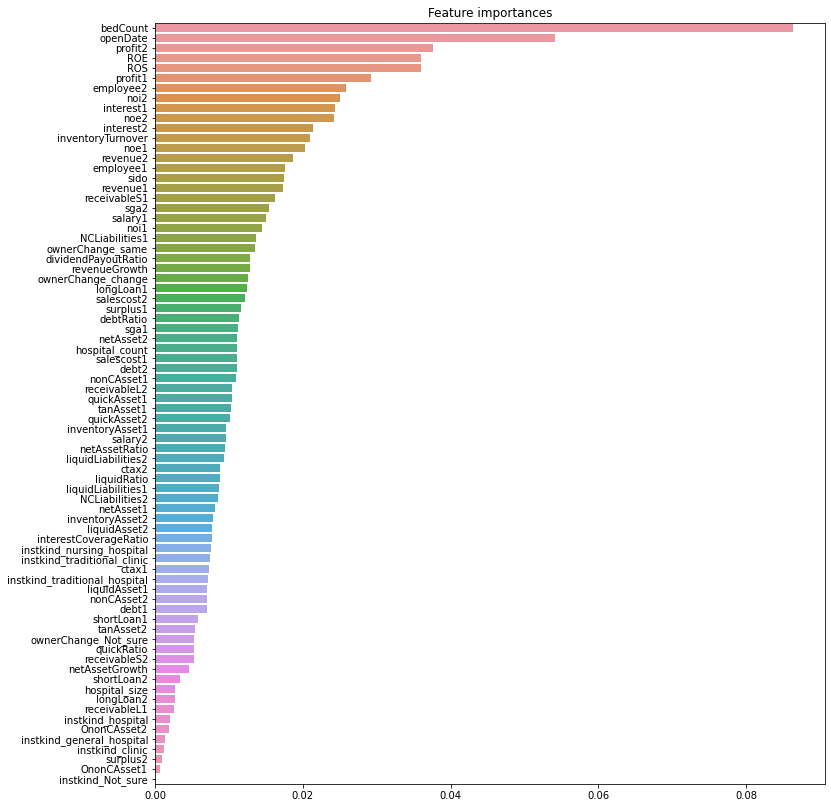

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values=rf_clf.feature_importances_ #피처 중요도
ftr_importances=pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top=ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(12,14))
plt.title('Feature importances')
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

params={
    'n_estimators':[300],
    'max_depth':[4,6,8,10,12],
    'min_samples_leaf':[6,8,12,18],
    'min_samples_split':[4,8,16,20]
}
#RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf=RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도:{0:4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 4, 'min_samples_leaf': 6, 'min_samples_split': 4, 'n_estimators': 300}
최고 예측 정확도:0.945833


In [ ]:
rf_clf1=RandomForestClassifier(n_estimators=300, max_depth=4, min_samples_leaf=6, min_samples_split=4, random_state=0)
rf_clf1.fit(X_train, y_train)
pred=rf_clf1.predict(X_test)
print('예측 정확도:{0:4f}'.format(accuracy_score(y_test, pred)))

예측 정확도:0.967213


## (2) XGBoost

In [57]:
import xgboost as xgb
from xgboost import XGBClassifier

In [58]:
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [ ]:
X_features = train.drop(columns = 'OC',axis=1)
y_label = train['OC']

X_train,X_test,y_train,y_test = train_test_split(X_features,y_label, test_size = 0.2, random_state = 156, stratify = y_label)
print(X_train.shape,X_test.shape)

(240, 76) (61, 76)


In [ ]:
print(y_train.value_counts()/y_train.shape[0]*100)
print(y_test.value_counts()/y_test.shape[0]*100)

1   95.00
0    5.00
Name: OC, dtype: float64
1   95.08
0    4.92
Name: OC, dtype: float64


In [ ]:
dtrain = xgb.DMatrix(data=X_train,label = y_train)
dtest = xgb.DMatrix(data=X_test,label = y_test)

In [ ]:
params = {
    'max_depth' :3,
    'eta' : 0.1,
    'objective' : 'binary:logistic',
    'eval_metric':'logloss',
    'early_stoppings':100
}
num_rounds = 400

In [ ]:
wlist=[(dtrain,'train'),(dtest,'eval')]
#하이퍼 파라미터와 early stopping 파라미터를 train() 함수의 파라미터로 전달
xgb_model=xgb.train(params=params,dtrain=dtrain,num_boost_round=num_rounds, early_stopping_rounds=100,evals=wlist)

[0]	train-logloss:0.612821	eval-logloss:0.61371
Multiple eval metrics have been passed: 'eval-logloss' will be used for early stopping.

Will train until eval-logloss hasn't improved in 100 rounds.
[1]	train-logloss:0.547308	eval-logloss:0.549717
[2]	train-logloss:0.491717	eval-logloss:0.501376
[3]	train-logloss:0.444667	eval-logloss:0.460712
[4]	train-logloss:0.403645	eval-logloss:0.421663
[5]	train-logloss:0.368505	eval-logloss:0.390216
[6]	train-logloss:0.337201	eval-logloss:0.361821
[7]	train-logloss:0.310018	eval-logloss:0.33592
[8]	train-logloss:0.286412	eval-logloss:0.313728
[9]	train-logloss:0.26569	eval-logloss:0.296092
[10]	train-logloss:0.247412	eval-logloss:0.279203
[11]	train-logloss:0.230458	eval-logloss:0.264242
[12]	train-logloss:0.21442	eval-logloss:0.25131
[13]	train-logloss:0.201092	eval-logloss:0.240103
[14]	train-logloss:0.187653	eval-logloss:0.230124
[15]	train-logloss:0.176942	eval-logloss:0.220976
[16]	train-logloss:0.165989	eval-logloss:0.213443
[17]	train-logl

In [ ]:
pred_probs=xgb_model.predict(dtest)
print('predict() 수행 결과값을 10개만 표시, 예측 확률값으로 표시됨')
print(np.round(pred_probs[:10],3))

#예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정해 리스트 객체인 preds에 저장
preds=[1 if x>0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시:',preds[:10])

predict() 수행 결과값을 10개만 표시, 예측 확률값으로 표시됨
[0.98  0.981 0.879 0.905 0.969 0.967 0.948 0.981 0.98  0.981]
예측값 10개만 표시: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score
from sklearn.metrics import f1_score,confusion_matrix,precision_recall_curve,roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [60]:
def get_clf_eval(y_test, pred=None, pred_proba=None): #평가 한번에 호출하는 함수
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)

  #ROC-AUC 추가
  roc_auc = roc_auc_score(y_test, pred_proba)

  print('오차행렬')
  print(confusion)
  print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율:{2:.4f}, F1 : {3:.4f}, AUC : {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [ ]:
get_clf_eval(y_test,preds,pred_probs)

오차행렬
[[ 0  3]
 [ 0 58]]
정확도 : 0.9508, 정밀도 : 0.9508, 재현율:1.0000, F1 : 0.9748, AUC : 0.8621


In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax=plt.subplots(figsize=(10,12))
plot_importance(xgb_model,ax=ax)

In [ ]:
xgb.cv(params,dtrain,num_boost_round=10,nfold=3,stratified=False,metrics=(),obj=None,feval=None,maximize=False,early_stopping_rounds=None,fpreproc=None,as_pandas=True,verbose_eval=None, show_stdv=True, seed=0, callbacks=None, shuffle=True)

,train-logloss-mean,train-logloss-std,test-logloss-mean,test-logloss-std
0,0.61,0.00,0.62,0.00
1,0.55,0.00,0.56,0.01
2,0.49,0.00,0.51,0.01
3,0.44,0.00,0.47,0.01
4,0.40,0.00,0.44,0.01
5,0.36,0.00,0.41,0.01
6,0.33,0.00,0.38,0.01
7,0.30,0.00,0.36,0.02
8,0.28,0.01,0.34,0.02
9,0.26,0.01,0.33,0.02


In [ ]:
from sklearn.model_selection import GridSearchCV

params={
    'n_estimators' : [100,200,300,400],
    'learning_rate' : [0.01,0.05,0.1,0.15],
    'max_depth' : [4,6,8,10,12],
    'min_child_weight' : [0.8,1,1.2],
    'gamma' : [0,1,2,3],
    'subsample':[0.8,1],
    'colsample_bytree' : [0.8,0.9],
}

xgb_clf = XGBClassifier(random_state=156, n_jobs=-1)
xgb_gridcv = GridSearchCV(xgb_clf, param_grid=params, cv=2, n_jobs=-1, verbose = 2)
xgb_gridcv.fit(X_train, y_train, 
           early_stopping_rounds=40, eval_metric="auc",
           eval_set=[(X_train, y_train), (X_test, y_test)])
print('GridSearchCV 최적 파라미터:\n', xgb_gridcv.best_params_)
print('최고 예측 정확도:{0:4f}'.format(xgb_gridcv.best_score_))

Fitting 2 folds for each of 3840 candidates, totalling 7680 fits
[0]	validation_0-auc:0.70614	validation_1-auc:0.974138
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 40 rounds.
[1]	validation_0-auc:0.874269	validation_1-auc:0.942529
[2]	validation_0-auc:0.919591	validation_1-auc:0.968391
[3]	validation_0-auc:0.914839	validation_1-auc:0.962644
[4]	validation_0-auc:0.934211	validation_1-auc:0.928161
[5]	validation_0-auc:0.9322	validation_1-auc:0.928161
[6]	validation_0-auc:0.931469	validation_1-auc:0.939655
[7]	validation_0-auc:0.934028	validation_1-auc:0.977012
[8]	validation_0-auc:0.930738	validation_1-auc:0.982759
[9]	validation_0-auc:0.928728	validation_1-auc:0.982759
[10]	validation_0-auc:0.933297	validation_1-auc:0.977012
[11]	validation_0-auc:0.929276	validation_1-auc:0.982759
[12]	validation_0-auc:0.928363	validation_1-auc:0.982759
[13]	validation_0-auc:0.927266	validation_1-auc:0.

**xgboost GridSearchCV 최적 파라미터**: {'eta(learning rate)': 0.01, 'num_round(n_estimators)': 100, 'max_depth': 4, 'min_child_weight': 0.8, 'gamma': 0, 'subsample': 0.8, 'colsample_bytree': 0.8}

In [ ]:
params={
    'n_estimators' : 100,
    'learning_rate' : 0.01,
    'max_depth' : 4,
    'min_child_weight' : 0.8,
    'subsample':0.8,
    'colsample_bytree' : 0.8,
    'objective' : 'binary:logistic',
    'eval_metric':'logloss',
    #'early_stoppings':100
}

In [ ]:
wlist=[(dtrain,'train'),(dtest,'eval')]
xgb_model=xgb.train(params=params,dtrain=dtrain,evals=wlist)

[0]	train-logloss:0.684699	eval-logloss:0.685013
[1]	train-logloss:0.676622	eval-logloss:0.676721
[2]	train-logloss:0.6685	eval-logloss:0.668919
[3]	train-logloss:0.660574	eval-logloss:0.661222
[4]	train-logloss:0.652772	eval-logloss:0.653562
[5]	train-logloss:0.645266	eval-logloss:0.646012
[6]	train-logloss:0.638042	eval-logloss:0.639132
[7]	train-logloss:0.630869	eval-logloss:0.631864
[8]	train-logloss:0.623646	eval-logloss:0.624528
[9]	train-logloss:0.616642	eval-logloss:0.617334


In [ ]:
pred_probs=xgb_model.predict(dtest)
preds=[1 if x>0.5 else 0 for x in pred_probs]

In [ ]:
get_clf_eval(y_test,preds,pred_probs)

오차행렬
[[ 0  3]
 [ 0 58]]
정확도 : 0.9508, 정밀도 : 0.9508, 재현율:1.0000, F1 : 0.9748, AUC : 0.9943


In [ ]:
xgb_clf2 =  XGBClassifier(n_estimators=100, learning_rate=0.01, max_depth=4, min_child_weight=0.8, subsample=0.8, colsample_bytree=0.8)

xgb_clf2.fit(X_train, y_train, early_stopping_rounds=40, eval_metric="logloss", eval_set=evals, verbose=True)

[0]	validation_0-logloss:0.685271
Will train until validation_0-logloss hasn't improved in 40 rounds.
[1]	validation_0-logloss:0.677108
[2]	validation_0-logloss:0.669366
[3]	validation_0-logloss:0.660821
[4]	validation_0-logloss:0.652786
[5]	validation_0-logloss:0.644635
[6]	validation_0-logloss:0.63686
[7]	validation_0-logloss:0.6293
[8]	validation_0-logloss:0.62219
[9]	validation_0-logloss:0.615186
[10]	validation_0-logloss:0.60823
[11]	validation_0-logloss:0.601587
[12]	validation_0-logloss:0.594537
[13]	validation_0-logloss:0.587915
[14]	validation_0-logloss:0.580998
[15]	validation_0-logloss:0.574564
[16]	validation_0-logloss:0.567734
[17]	validation_0-logloss:0.56188
[18]	validation_0-logloss:0.555547
[19]	validation_0-logloss:0.549505
[20]	validation_0-logloss:0.543226
[21]	validation_0-logloss:0.537625
[22]	validation_0-logloss:0.531785
[23]	validation_0-logloss:0.526433
[24]	validation_0-logloss:0.520726
[25]	validation_0-logloss:0.515565
[26]	validation_0-logloss:0.50997
[27]

XGBClassifier(colsample_bytree=0.8, learning_rate=0.01, max_depth=4,
              min_child_weight=0.8, subsample=0.8)

## (3) LightGBM

In [62]:
# LightGBM의 파이썬 패키지인 lightgbm에서 LGBMClassifier 임포트
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [ ]:
X_features = train.drop(columns = 'OC',axis=1)
y_label = train['OC']

X_train,X_test,y_train,y_test = train_test_split(X_features,y_label, test_size = 0.2, random_state = 156)
print(X_train.shape,X_test.shape)

(240, 76) (61, 76)


In [ ]:
print(y_train.value_counts()/y_train.shape[0]*100)
print(y_test.value_counts()/y_test.shape[0]*100)

1   94.58
0    5.42
Name: OC, dtype: float64
1   96.72
0    3.28
Name: OC, dtype: float64


In [ ]:
lgbm_clf1 = LGBMClassifier(n_estimators=400)

# LightGBM도 XGBoost와 동일하게 조기중단 수행가능
evals = [(X_test, y_test)]
lgbm_clf1.fit(X_train, y_train,
                 early_stopping_rounds=100, eval_metric="logloss",
                 eval_set=evals, verbose=True)
preds1 = lgbm_clf1.predict(X_test)
pred_proba1 = lgbm_clf1.predict_proba(X_test)[:, 1]

[1]	valid_0's binary_logloss: 0.1426	valid_0's binary_logloss: 0.1426
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's binary_logloss: 0.139996	valid_0's binary_logloss: 0.139996
[3]	valid_0's binary_logloss: 0.133799	valid_0's binary_logloss: 0.133799
[4]	valid_0's binary_logloss: 0.129747	valid_0's binary_logloss: 0.129747
[5]	valid_0's binary_logloss: 0.128173	valid_0's binary_logloss: 0.128173
[6]	valid_0's binary_logloss: 0.126355	valid_0's binary_logloss: 0.126355
[7]	valid_0's binary_logloss: 0.126703	valid_0's binary_logloss: 0.126703
[8]	valid_0's binary_logloss: 0.125347	valid_0's binary_logloss: 0.125347
[9]	valid_0's binary_logloss: 0.12416	valid_0's binary_logloss: 0.12416
[10]	valid_0's binary_logloss: 0.12587	valid_0's binary_logloss: 0.12587
[11]	valid_0's binary_logloss: 0.125259	valid_0's binary_logloss: 0.125259
[12]	valid_0's binary_logloss: 0.125556	valid_0's binary_logloss: 0.125556
[13]	valid_0's binary_logloss: 0.122404	valid_0's bina

In [ ]:
get_clf_eval(y_test,preds1,pred_proba1)

오차행렬
[[ 0  2]
 [ 0 59]]
정확도 : 0.9672, 정밀도 : 0.9672, 재현율:1.0000, F1 : 0.9833, AUC : 0.7458


In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

params = {
    'num_leaves':[32,64],
    'max_depth':[128, 160], 
    'min_child_samples':[60,100],
    'subsample':[0.8,1]
}

# cv는 3으로 지정
lgbm_gridcv= GridSearchCV(lgbm_clf1, param_grid=params, cv=3)
lgbm_gridcv.fit(X_train, y_train, 
           early_stopping_rounds=30, eval_metric="logloss",
           eval_set=[(X_train, y_train), (X_test, y_test)])
print('GridSearchCV 최적 파라미터:', gridcv.best_params_)
print('최고 예측 정확도:{0:4f}'.format(lgbm_gridcv.best_score_))

[1]	valid_0's binary_logloss: 0.206745	valid_0's binary_logloss: 0.206745	valid_1's binary_logloss: 0.148881	valid_1's binary_logloss: 0.148881
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's binary_logloss: 0.204251	valid_0's binary_logloss: 0.204251	valid_1's binary_logloss: 0.150851	valid_1's binary_logloss: 0.150851
[3]	valid_0's binary_logloss: 0.201116	valid_0's binary_logloss: 0.201116	valid_1's binary_logloss: 0.149707	valid_1's binary_logloss: 0.149707
[4]	valid_0's binary_logloss: 0.199198	valid_0's binary_logloss: 0.199198	valid_1's binary_logloss: 0.151534	valid_1's binary_logloss: 0.151534
[5]	valid_0's binary_logloss: 0.196632	valid_0's binary_logloss: 0.196632	valid_1's binary_logloss: 0.150617	valid_1's binary_logloss: 0.150617
[6]	valid_0's binary_logloss: 0.195378	valid_0's binary_logloss: 0.195378	valid_1's binary_logloss: 0.153089	valid_1's binary_logloss: 0.153089
[7]	valid_0's binary_logloss: 0.193203	valid_0's binary_logloss: 0.193203	

light gbm GridSearchCV 최적 파라미터: {'max_depth': 128, 'min_child_samples': 60, 'num_leaves': 32, 'subsample': 0.8}

In [ ]:
## 최적파라미터로 학습/예측/평가
lgbm_clf2 =  LGBMClassifier(n_estimators=400, num_leaves=32 ,subsample=0.8, min_child_samples=60,max_depth=128)

evals = [(X_test, y_test)]
lgbm_clf2.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, verbose=True)

preds2 = lgbm_clf2.predict(X_test)
pred2_proba = lgbm_clf2.predict_proba(X_test)[:, 1]

get_clf_eval(y_test,preds2,pred2_proba)

[1]	valid_0's binary_logloss: 0.14563	valid_0's binary_logloss: 0.14563
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's binary_logloss: 0.142711	valid_0's binary_logloss: 0.142711
[3]	valid_0's binary_logloss: 0.141768	valid_0's binary_logloss: 0.141768
[4]	valid_0's binary_logloss: 0.143791	valid_0's binary_logloss: 0.143791
[5]	valid_0's binary_logloss: 0.142936	valid_0's binary_logloss: 0.142936
[6]	valid_0's binary_logloss: 0.143587	valid_0's binary_logloss: 0.143587
[7]	valid_0's binary_logloss: 0.144272	valid_0's binary_logloss: 0.144272
[8]	valid_0's binary_logloss: 0.147274	valid_0's binary_logloss: 0.147274
[9]	valid_0's binary_logloss: 0.146707	valid_0's binary_logloss: 0.146707
[10]	valid_0's binary_logloss: 0.149599	valid_0's binary_logloss: 0.149599
[11]	valid_0's binary_logloss: 0.150485	valid_0's binary_logloss: 0.150485
[12]	valid_0's binary_logloss: 0.153183	valid_0's binary_logloss: 0.153183
[13]	valid_0's binary_logloss: 0.154178	valid_0'

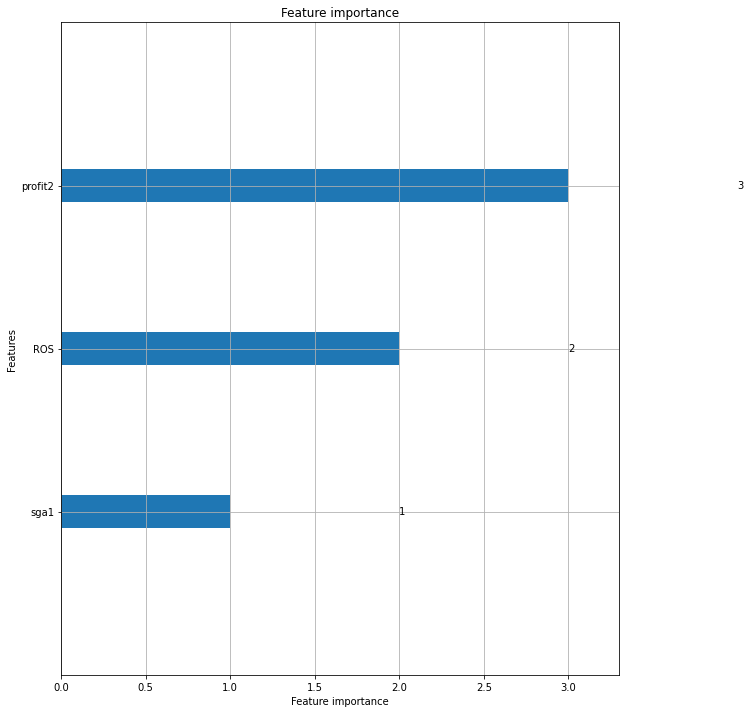

In [ ]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax=plt.subplots(figsize=(10,12))
plot_importance(lgbm_clf2,ax=ax)

# 메타 모델 피팅 및 튜닝

## (1) Soft Voting


In [ ]:
# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기 
from sklearn.ensemble import VotingClassifier
vo_clf = VotingClassifier(estimators=[('RF',rf_clf1),('XGB',xgb_clf2),('LGBM',lgbm_clf2)] , voting='soft')

X_train, X_test, y_train, y_test = train_test_split(X_features,y_labels, test_size=0.2 , random_state= 156)

# VotingClassifier 학습/예측/평가. 
vo_clf.fit(X_train , y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

# 개별 모델의 학습/예측/평가.
classifiers = [rf_clf1,xgb_clf2,lgbm_clf2]
for classifier in classifiers:
    classifier.fit(X_train , y_train)
    pred = classifier.predict(X_test)
    class_name= classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test , pred)))

Voting 분류기 정확도: 0.9508
RandomForestClassifier 정확도: 0.9672
XGBClassifier 정확도: 0.9672
LGBMClassifier 정확도: 0.9344


In [ ]:
test2 = test.drop(columns = 'OC',axis=1)
pred2 = vo_clf.predict(test2)
submission = pd.read_csv('/content/drive/MyDrive/ESAA/YB 1조/9565_hospital_data/submission_sample.csv')
submission['OC'] = pred2

In [ ]:
submission.to_csv('/content/drive/MyDrive/ESAA/YB 1조/9565_hospital_data/submission.csv', index=False)

In [ ]:
submission.head()

,inst_id,OC
0,2,1
1,5,1
2,6,1
3,8,1
4,10,1


In [ ]:
xgb_clf2 =  XGBClassifier(n_estimators=100, learning_rate=0.01, max_depth=4, min_child_weight=0.8, subsample=0.8, colsample_bytree=0.8)

xgb_clf2.fit(X_train, y_train)
pred3 = xgb.predict(test2)
sub_xgv['OC'] = pred3
sub_xgv[sub.OC==0]['inst_id']

## (2) Stacking

In [63]:
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [64]:
train.sido

0       2
1       9
2       8
3      10
4       9
       ..
296    12
297     2
298     7
299     8
300    14
Name: sido, Length: 301, dtype: int64

In [65]:
X_features = train.drop(columns = 'OC',axis=1)
y_labels = train['OC']
X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=156)

In [66]:
rf_clf1=RandomForestClassifier(n_estimators=300, max_depth=4, min_samples_leaf=6, min_samples_split=4, random_state=0)
xgb_clf2 =  XGBClassifier(n_estimators=100, learning_rate=0.01, max_depth=4, min_child_weight=0.8, subsample=0.8, colsample_bytree=0.8)
lgbm_clf2 =  LGBMClassifier(n_estimators=400, num_leaves=32 ,subsample=0.8, min_child_samples=60,max_depth=128)
knn_clf = KNeighborsClassifier(n_neighbors=4)

In [67]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수. 
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds ):
    # 지정된 n_folds값으로 KFold 생성.
    kf = KFold(n_splits=n_folds, shuffle=False) #, random_state=0) 이거하면 오류뜸
    #추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화 
    train_fold_pred = np.zeros((X_train_n.shape[0] ,1 ))
    test_pred = np.zeros((X_test_n.shape[0],n_folds))
    print(model.__class__.__name__ , ' model 시작 ')
    
    # 학습
    for folder_counter , (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        #입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 셋 추출 
        print('\t 폴드 세트: ',folder_counter,' 시작 ')
        X_tr = X_train_n.iloc[train_index] 
        y_tr = y_train_n.iloc[train_index] 
        X_te = X_train_n.iloc[valid_index]  
        
        #폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
        model.fit(X_tr, y_tr)       
        #폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        #입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장. 
        test_pred[:, folder_counter] = model.predict(X_test_n)
            
    # 테스트
    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성 
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)    
    
    #train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred , test_pred_mean

test2 = test.drop(columns = 'OC',axis=1)
knn_train, knn_test = get_stacking_base_datasets(knn_clf, X_train, y_train, test2, 7)
rf_train, rf_test = get_stacking_base_datasets(rf_clf1, X_train, y_train, test2, 7)
xgb_train, xgb_test = get_stacking_base_datasets(xgb_clf2, X_train, y_train, test2,  7)    
lgbm_train, lgbm_test = get_stacking_base_datasets(lgbm_clf2, X_train, y_train, test2, 7)

KNeighborsClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
RandomForestClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
XGBClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
LGBMClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 


In [68]:
# 각 모델별 학습/테스트 데이터 합치기
Stack_final_X_train = np.concatenate((knn_train, rf_train, xgb_train, lgbm_train), axis=1)
Stack_final_X_test = np.concatenate((knn_test, rf_test, xgb_test, lgbm_test), axis=1)
print('원본 학습 피처 데이터 Shape:',X_train.shape, '원본 테스트 피처 Shape:',X_test.shape)
print('스태킹 학습 피처 데이터 Shape:', Stack_final_X_train.shape,
      '스태킹 테스트 피처 데이터 Shape:',Stack_final_X_test.shape)


원본 학습 피처 데이터 Shape: (240, 76) 원본 테스트 피처 Shape: (61, 76)
스태킹 학습 피처 데이터 Shape: (240, 4) 스태킹 테스트 피처 데이터 Shape: (127, 4)


In [69]:
# 최종 메타 모델 돌리기
lr_final = LogisticRegression(C=10)
lr_final.fit(Stack_final_X_train, y_train) # 최종 메타 모델 돌릴 때, 원본 학습 라벨 y_train 가져야 써야함
stack_final = lr_final.predict(Stack_final_X_test)

#print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, stack_final)))

ValueError: ignored

In [ ]:
submission = pd.read_csv('/content/drive/MyDrive/PyCo_ESAA/데이터셋/9565_hospital_data/submission_sample.csv')
submission.shape

(127, 2)

In [ ]:

submission = pd.read_csv('/content/drive/MyDrive/PyCo_ESAA/데이터셋/9565_hospital_data/submission_sample.csv')
submission['OC'] = stack_final

In [ ]:
submission.to_csv('/content/drive/MyDrive/PyCo_ESAA/데이터셋/9565_hospital_data/submission_sample_mini2_stacking.csv', index=False)

In [ ]:
submission.head()

,inst_id,OC
0,2,1
1,5,1
2,6,1
3,8,1
4,10,1


* 데이콘 리더보드 제출시 점수 : 0.873015873